### **Rayuan - Rate Your Handwriting**

Machine Learning Path Team :
1. Dhiemas Ady Kusuma Wardana (M2297F2543) - Machine Learning - Universitas Pembangunan Nasional Veteran Yogyakarta
2. Muhammad Zidni Subarkah (M7312F2706) - Machine Learning - Universitas Sebelas Maret
3. Ricky Indra Gunawan (M2313F2719) - Machine Learning -  Universitas Siliwangi


#Load Drive

Dikarenakan dataset yang digunakan terdapat pada Drive, maka perlu melakukan import dan loading Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install and Load Libraries

Melakukan install dan import libraries yang digunakan dalam project ini.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
!pip install  visualkeras
!pip3 install ann_visualizer
!pip install graphviz
!pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 27.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=7e49e28f69f2f67d847d44f06b879713d3dcb29b9d52a46b65773e4553c2517a
  Stored in directory: /root/.cache/pip/wheels/1b/fc/58/2ab1c3b30350105929308becddda4fb59b1358e54f985e1f4a
Successfully built ann-visualizer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications.efficientnet import preprocess_input, EfficientNetB1
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from torchvision.utils import make_grid
import keras
from glob import glob
import pandas as pd
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix
import visualkeras
import os
from tqdm import tqdm
import cv2
import matplotlib.cm as cm
from IPython.display import Image, display
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from rarfile import RarFile
from PIL import Image
from keras.models import load_model
from keras.preprocessing import image
import tensorflow as tf
import pickle
tf.config.run_functions_eagerly(True)

## Membuat Set Data Training and Validation 0.7 : 0.30

In [ ]:
import os
import os.path
import shutil
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import random

In [ ]:
image_path =Path('/content/drive/MyDrive/Bangkit/Dataset')

In [ ]:
base_dir = image_path
train_dir = os.path.join(base_dir,'Training')
validation_dir = os.path.join(base_dir, 'Initial Validation')
Poor_dir = os.path.join(base_dir, 'Poor')
Uncertain_dir = os.path.join(base_dir, 'Uncertain')
Okay_dir = os.path.join(base_dir, 'Okay')
Great_dir = os.path.join(base_dir, 'Great')
Excellent_dir = os.path.join(base_dir, 'Excellent')

In [ ]:
train_Poor = os.path.join(train_dir, 'Poor')
val_Poor = os.path.join(validation_dir, 'Poor')

train_Uncertain = os.path.join(train_dir, 'Uncertain')
val_Uncertain = os.path.join(validation_dir, 'Uncertain')

train_Okay = os.path.join(train_dir, 'Okay')
val_Okay = os.path.join(validation_dir, 'Okay')

train_Great = os.path.join(train_dir, 'Great')
val_Great = os.path.join(validation_dir, 'Great')

train_Excellent = os.path.join(train_dir, 'Excellent')
val_Excellent = os.path.join(validation_dir, 'Excellent')

In [ ]:
list_directory=[train_dir,validation_dir,train_Poor,val_Poor,
                train_Uncertain,val_Uncertain,train_Okay,val_Okay, train_Great, val_Great, train_Excellent, val_Excellent]
for i in list_directory:
  os.mkdir(i)

In [ ]:
train_Poor_dir, val_Poor_dir = train_test_split(os.listdir(Poor_dir), test_size = 0.30)
train_Uncertain_dir, val_Uncertain_dir = train_test_split(os.listdir(Uncertain_dir), test_size = 0.30)
train_Okay_dir, val_Okay_dir = train_test_split(os.listdir(Okay_dir), test_size = 0.30)
train_Great_dir, val_Great_dir = train_test_split(os.listdir(Great_dir), test_size = 0.30)
train_Excellent_dir, val_Excellent_dir = train_test_split(os.listdir(Excellent_dir), test_size = 0.30)

for file in train_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(train_Poor, file))
for file in train_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(train_Uncertain,file))
for file in train_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(train_Okay,file))
for file in train_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(train_Great,file))
for file in train_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(train_Excellent,file))
for file in val_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(val_Poor, file))
for file in val_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(val_Uncertain,file))
for file in val_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(val_Okay,file))
for file in val_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(val_Great,file))
for file in val_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(val_Excellent,file))

## Membuat Set Data Training, Validation, and Testing 0.7 : 0.15 : 0.15

In [ ]:
image_path2= Path('/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/')

In [ ]:
base_dir2 = image_path2
test_dir = os.path.join(base_dir2, 'Testing')
validation_dir = os.path.join(base_dir2, 'Validation')
Poor_dir = os.path.join(base_dir2, 'Poor')
Uncertain_dir = os.path.join(base_dir2, 'Uncertain')
Okay_dir = os.path.join(base_dir2, 'Okay')
Great_dir = os.path.join(base_dir2, 'Great')
Excellent_dir = os.path.join(base_dir2, 'Excellent')

In [ ]:
test_Poor = os.path.join(test_dir, 'Poor')
val_Poor = os.path.join(validation_dir, 'Poor')

test_Uncertain = os.path.join(test_dir, 'Uncertain')
val_Uncertain = os.path.join(validation_dir, 'Uncertain')

test_Okay = os.path.join(test_dir, 'Okay')
val_Okay = os.path.join(validation_dir, 'Okay')

test_Great = os.path.join(test_dir, 'Great')
val_Great = os.path.join(validation_dir, 'Great')

test_Excellent = os.path.join(test_dir, 'Excellent')
val_Excellent = os.path.join(validation_dir, 'Excellent')

In [ ]:
list_directory=[test_dir,validation_dir,test_Poor,val_Poor,
                test_Uncertain,val_Uncertain,test_Okay,val_Okay, test_Great, val_Great, test_Excellent, val_Excellent]
for i in list_directory:
  os.mkdir(i)

In [ ]:
test_Poor_dir, val_Poor_dir = train_test_split(os.listdir(Poor_dir), test_size = 0.50)
test_Uncertain_dir, val_Uncertain_dir = train_test_split(os.listdir(Uncertain_dir), test_size = 0.50)
test_Okay_dir, val_Okay_dir = train_test_split(os.listdir(Okay_dir), test_size = 0.50)
test_Great_dir, val_Great_dir = train_test_split(os.listdir(Great_dir), test_size = 0.50)
test_Excellent_dir, val_Excellent_dir = train_test_split(os.listdir(Excellent_dir), test_size = 0.50)

for file in test_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(test_Poor, file))
for file in test_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(test_Uncertain,file))
for file in test_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(test_Okay,file))
for file in test_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(test_Great,file))
for file in test_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(test_Excellent,file))
for file in val_Poor_dir:
  shutil.copy(os.path.join(Poor_dir, file), os.path.join(val_Poor, file))
for file in val_Uncertain_dir:
  shutil.copy(os.path.join(Uncertain_dir,file), os.path.join(val_Uncertain,file))
for file in val_Okay_dir:
  shutil.copy(os.path.join(Okay_dir,file), os.path.join(val_Okay,file))
for file in val_Great_dir:
  shutil.copy(os.path.join(Great_dir,file), os.path.join(val_Great,file))
for file in val_Excellent_dir:
  shutil.copy(os.path.join(Excellent_dir,file), os.path.join(val_Excellent,file))

# Data Loading

Membagi dataset menjadi dua bagian, yakni data latih, data validasi dengan perbandingan 8:2.

In [ ]:
train_path = '/content/drive/MyDrive/Bangkit/Dataset/Training'
val_path = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation'
test_path = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing'

# Exploratory Data Analysis

Melakukan eksplorasi pada dataset yang ada.

Yang pertama yakni mengecek jumlah kelas yang ada.

In [ ]:
numberOfClass = len(glob(train_path+"/*")) 
print("Number of Class: ",numberOfClass)

Number of Class:  5


Diperoleh terdapat 5 kelas dalam dataset.

Selanjutnya dilakukan pendefinisian untuk visualisasi sampel citra rontgen dada.

In [ ]:
def sampleImage(sampe_image_path):
  img = load_img(sampe_image_path)
  x = img_to_array(img)
  print(x.shape)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

Excellent

(2812, 2521, 3)


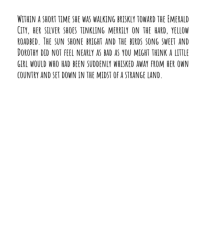

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Excellent/Untitled-1-Recovered-Recovered2_0031s_0001_Within a short time she was walking briskly toward the Emerald .jpg"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2812 x 2521.

Great

(2811, 2521, 3)


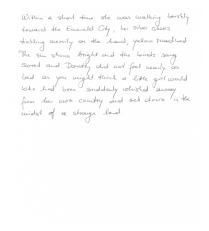

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Great/w0035_s02_pWOZ_r03.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Okay

(2811, 2521, 3)


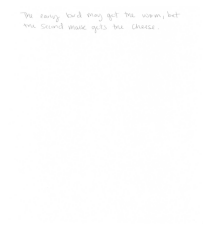

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Okay/w0001_s01_pPHR_r03.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2808 x 2521.

Uncertain

(2811, 2521, 3)


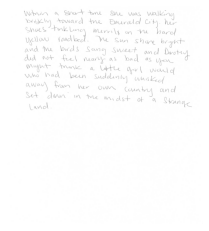

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain/w0001_s01_pWOZ_r03.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2811 x 2521.

Poor

(2818, 2521, 3)


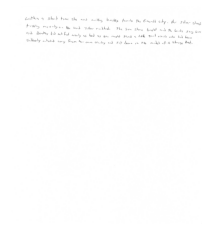

In [ ]:
sample_image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Poor/w0002_s01_pWOZ_r01.png"
sampleImage(sample_image_path)

Citra di atas merupakan citra handwriting dengan ukuran piksel 2824 x 2521.

Selanjutnya dilakukan pengecekan kembali informasi dataset

In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Training/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 1288 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [128, 156, 462, 349, 193]
Dimensi citra: 2521 x 2812


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Validation/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 278 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [28, 34, 99, 75, 42]
Dimensi citra: 2521 x 2807


In [ ]:
dataDir = '/content/drive/MyDrive/Bangkit/Dataset/Initial Validation/Testing/'               
classNames = os.listdir(dataDir)  
numClass = len(classNames)      
imageFiles = [[os.path.join(dataDir,classNames[i],x) for x in os.listdir(os.path.join(dataDir,classNames[i]))]
              for i in range(numClass)]       
numEach = [len(imageFiles[i]) for i in range(numClass)]   
imageFilesList = []            
imageClass = []                 
for i in range(numClass):
    imageFilesList.extend(imageFiles[i])
    imageClass.extend([i]*numEach[i])
numTotal = len(imageClass)       
imageWidth, imageHeight = Image.open(imageFilesList[0]).size        

print("Terdapat",numTotal,"citra handwriting",numClass,"kelas pada dataset")
print("Nama kelas:",classNames)
print("Banyak kelas:",numEach)
print("Dimensi citra:",imageWidth,"x",imageHeight)

Terdapat 275 citra handwriting 5 kelas pada dataset
Nama kelas: ['Poor', 'Uncertain', 'Okay', 'Great', 'Excellent']
Banyak kelas: [27, 33, 99, 75, 41]
Dimensi citra: 2521 x 2812


Selanjutnya melihat secara random 9 citra pada semua kelas.

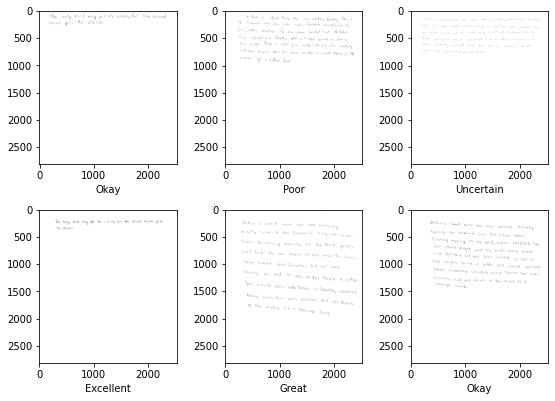

In [ ]:
plt.subplots(1,3,figsize=(8,8))
for i,k in enumerate(np.random.randint(numTotal, size=6)):  
    im = Image.open(imageFilesList[k])                    
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(classNames[imageClass[k]])
    plt.imshow(arr,cmap='gray',vmin=0,vmax=255)
plt.tight_layout()
plt.show()

Sebelum dilanjutkan ke data preprocessing melakukan pengecheckan ulang terhadap file agar memudahkan preprocessing 

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("/content/drive/MyDrive/Bangkit/Dataset").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

# Data Preprocessing

Data processing pertama yang dilakukan yakni augmentasi data pada data latih, seperti zoom range, horizontal flip, dan shear range. Kemudian merubah dimensi citra menjadi 224 x 224 piksel.

In [ ]:
def custom_augmentation(np_tensor):
 
  def random_contrast(np_tensor):
    return tf.image.random_contrast(np_tensor, 0.5, 2)
  
  augmnted_tensor = random_contrast(np_tensor)
  return np.array(augmnted_tensor)

In [ ]:
train_data_gen = ImageDataGenerator(brightness_range=[0.7,1.0],
                                    zoom_range=[1.0,1.7],
                                    preprocessing_function= preprocess_input
                                    # preprocessing_function=custom_augmentation
                                    )

train = train_data_gen.flow_from_directory(directory= train_path,
                                           color_mode='grayscale', 
                                           target_size=(224,224)
                                           )

Found 1288 images belonging to 5 classes.


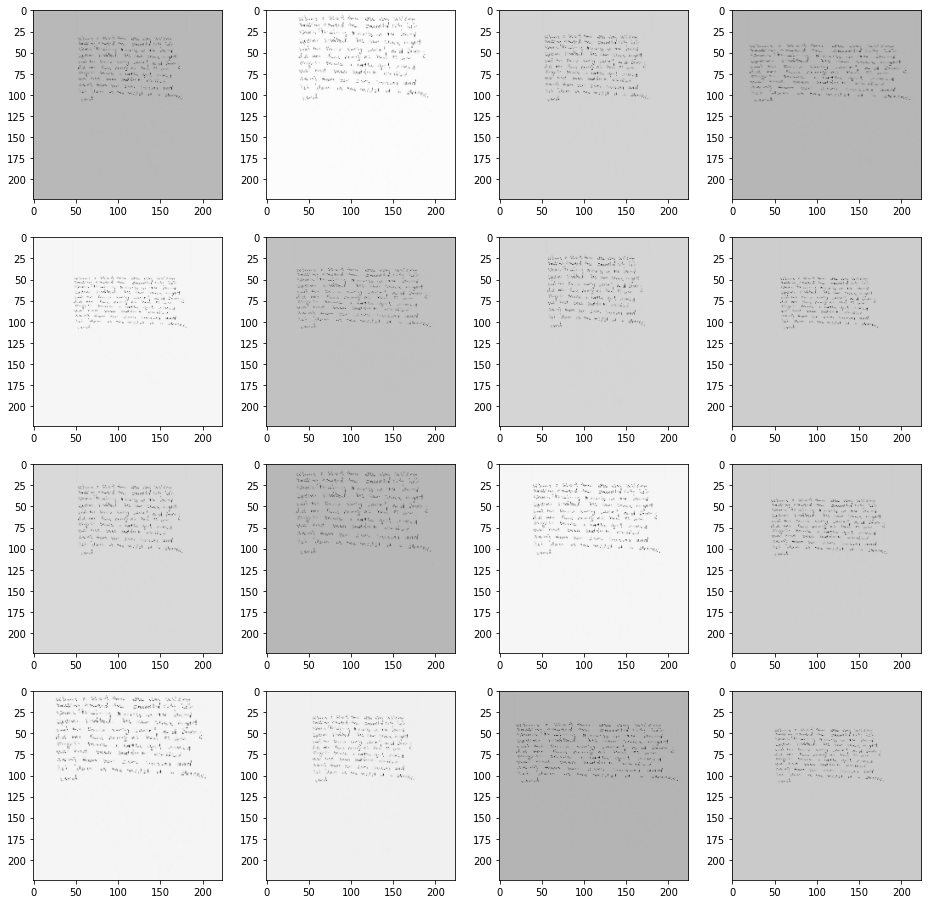

In [ ]:
image_path = "/content/drive/MyDrive/Bangkit/Dataset/Training/Uncertain/w0001_s01_pWOZ_r03.png"
img = keras.preprocessing.image.load_img(image_path, target_size= (224,224))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)



pic = train_data_gen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))

for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

Pada data validasi juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
validation_data_gen = ImageDataGenerator(preprocessing_function = preprocess_input)

valid = validation_data_gen.flow_from_directory(directory= val_path,
                                                color_mode='grayscale', 
                                                target_size=(224,224)
                                                )

Found 278 images belonging to 5 classes.


Pada data uji juga dilakukan perubahan dimensi citra menjadi 224 x 224 piksel

In [ ]:
test_data_gen = ImageDataGenerator(preprocessing_function= preprocess_input )

test = train_data_gen.flow_from_directory(directory= test_path ,
                                          color_mode='grayscale', 
                                          target_size=(224,224), 
                                          shuffle= False
                                          )

Found 275 images belonging to 5 classes.


In [ ]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

Berikut merupakan visualisasi dari augmentasi data yang dilakukan pada data latih.

In [ ]:
class_type = {0:'Excellent',  1 : 'Great', 2:'Okay', 3:'Poor',4:'Uncertain'}

In [ ]:
labels = ['Excellent', 'Great', 'Okay', 'Poor','Uncertain']

## Balancing Training Data

# Model Defining

Pada penelitian ini menggunakan EfficientNet B0 sebagai pre-trained model dengan tidak mem-freeze lapisan-lapisan yang ada. Hal ini guna memperbarui parameter.

In [ ]:
efficientNet = EfficientNetB1(weights='imagenet',include_top=False,input_shape=(224,224,3))

27033600/27018416 [==============================] - 0s 0us/step


In [ ]:
for layer in efficientNet.layers:         
  layer.trainable = False

## Layers of the EfficientNet

In [ ]:
efficientNet.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

## Visualize of the EfficientNet

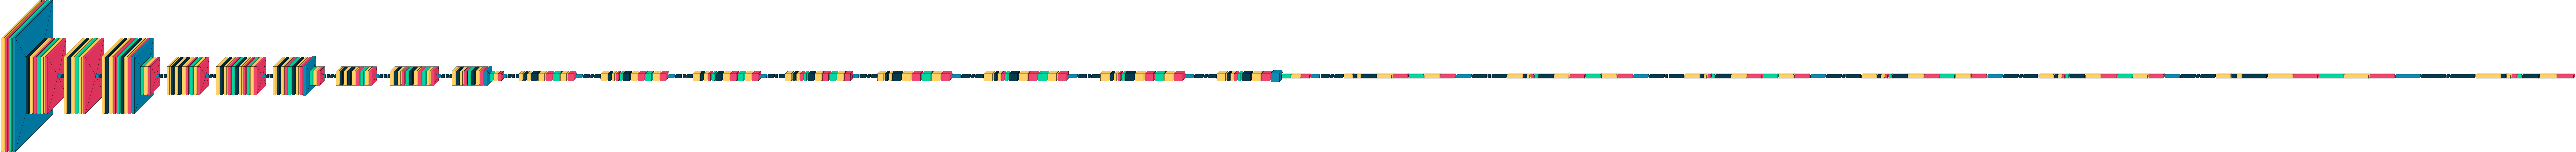

In [ ]:
visualkeras.layered_view(efficientNet)

In [ ]:
x = Flatten()(efficientNet.output)
x = tf.keras.layers.Dense(numberOfClass,activation='softmax')(x)

# creating our model.
model = tf.keras.models.Model(inputs=efficientNet.input, outputs = x)

Layers of the Model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

## Visualize of the Model

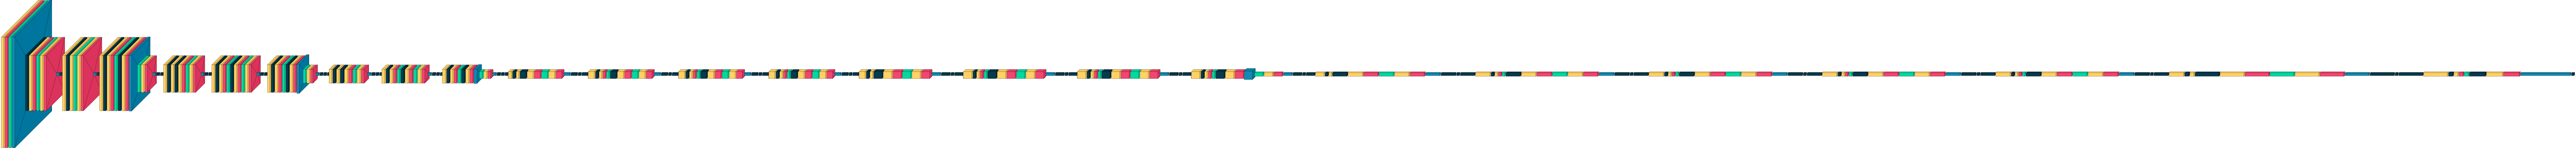

In [ ]:
visualkeras.layered_view(model)

Selanjutnya dilakukan pendefinisian model dengan optimasi Adam dan optimasi SGD. Fungsi loss yang digunakan yakni categorical crossentropy dan metrics akurasi.

## Adam Optimizer

In [ ]:
modela1 = model
opt_a1 = tf.keras.optimizers.Adam(learning_rate=1e-2)
modela1.compile(loss='categorical_crossentropy',
              optimizer = opt_a1, 
              metrics= ['accuracy'])

In [ ]:
modela2 = model
opt_a2 = tf.keras.optimizers.Adam(learning_rate=1e-3)
modela2.compile(loss='categorical_crossentropy',
              optimizer = opt_a2, 
              metrics= ['accuracy'])

## SGD

In [ ]:
models1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-2)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [ ]:
models2 = model
opt_s2 = tf.keras.optimizers.SGD(learning_rate=1e-3)
models2.compile(loss='categorical_crossentropy',
              optimizer = opt_s2, 
              metrics= ['accuracy'])

## RMSProp

In [ ]:
modelr1 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-4)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

In [ ]:
modelr2 = model
opt_s1 = tf.keras.optimizers.SGD(learning_rate=1e-4)
models1.compile(loss='categorical_crossentropy',
              optimizer = opt_s1, 
              metrics= ['accuracy'])

# Model Training

Selanjutnya dilakukan model training.

## Adam

In [ ]:
train.class_indices

{'Excellent': 0, 'Great': 1, 'Okay': 2, 'Poor': 3, 'Uncertain': 4}

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 15, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a1 = modela1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

Epoch 1/300
41/41 [==============================] - 434s 11s/step - loss: 1.4749 - accuracy: 0.3346
Epoch 2/300
41/41 [==============================] - 440s 11s/step - loss: 1.4663 - accuracy: 0.3680
Epoch 3/300
41/41 [==============================] - 448s 11s/step - loss: 1.4245 - accuracy: 0.3866
Epoch 4/300
41/41 [==============================] - 448s 11s/step - loss: 1.4297 - accuracy: 0.3898
Epoch 5/300
41/41 [==============================] - 443s 11s/step - loss: 1.4167 - accuracy: 0.3859
Epoch 6/300
41/41 [==============================] - 447s 11s/step - loss: 1.3973 - accuracy: 0.3905
Epoch 7/300
41/41 [==============================] - 448s 11s/step - loss: 1.3985 - accuracy: 0.4107
Epoch 8/300
41/41 [==============================] - 450s 11s/step - loss: 1.4079 - accuracy: 0.4092
Epoch 9/300
41/41 [==============================] - 444s 11s/step - loss: 1.3925 - accuracy: 0.4014
Epoch 10/300
41/41 [==============================] - 440s 11s/step - loss: 1.3908 - accura

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modela2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_a2 = modela2.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

## SGD

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s1 = models1.fit(train,
                 epochs =300, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Models2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =50, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

## RMSProp

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modelr1_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =50, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

In [ ]:
es = EarlyStopping(monitor= "val_accuracy" , 
                   min_delta= 0.001, 
                   patience= 9, 
                   verbose=1)
mc = ModelCheckpoint(filepath="Modelr2_Best.h5", 
                     monitor="val_accuracy", 
                     verbose=1, 
                     save_best_only= True)
hist_s2 = models2.fit(train,
                 epochs =50, 
                 verbose=1, 
                 batch_size=16,
                 validation_data=valid,
                 validation_steps=10,
                 callbacks=[es,mc]
                 )

# Visualize of the Graph

Dari hasil model training, kemudian dilakukan visualisasi dengan grafik terhadap hasil validasi loss dan validasi accuracy pada masing-masing model.

In [ ]:
print(hist_a1.history.keys())

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_loss"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_loss"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_loss"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_loss"],label = "SGD LR 0,001")
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["val_accuracy"],label = "Adam LR 0,01")
plt.plot(hist_a2.history["val_accuracy"],label = "Adam LR 0,001")
plt.plot(hist_s1.history["val_accuracy"],label = "SGD LR 0,01")
plt.plot(hist_s2.history["val_accuracy"],label = "SGD LR 0,001")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adam

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["loss"],label = "Training Loss")
plt.plot(hist_a1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["loss"],label = "Training Loss")
plt.plot(hist_a2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_a2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_a2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## SGD

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["loss"],label = "Training Loss")
plt.plot(hist_s1.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s1.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s1.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["loss"],label = "Training Loss")
plt.plot(hist_s2.history["val_loss"],label = "Validation Loss")
plt.title("Training Loss & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(hist_s2.history["accuracy"],label = "Training Accuracy")
plt.plot(hist_s2.history["val_accuracy"],label = "Validation Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Best Model

Diperoleh model yang sangat baik yaitu EfficientNet B0 dengan Adam optimizer dan learning rate 0,001. Kemudian load model untuk dilakukan evaluasi model.

In [ ]:
modelf = load_model("Models2_Best (1).h5")

In [ ]:
modelf.summary()

# Model Evaluation

Selanjutnya melakukan evaluasi model menggunakan data uji.

In [ ]:
predictions = modelf.predict_generator(test)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1) 

true_classes = test.classes
class_labels = list(test.class_indices.keys()) 

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))

sns.heatmap(confusion_matrix(true_classes, predicted_classes),
            ax=ax,
            xticklabels=labels,
            yticklabels=labels,
            annot=True,
            cmap=colors_green[::-1],
            alpha=0.7,
            linewidths=2,
            linecolor=colors_dark[3]
            )

fig.text(s='Confusion Matrix',
         size=18,
         fontweight='bold',
         fontname='monospace',
         color=colors_dark[1],
         y=0.92,
         x=0.28,
         alpha=0.8)
print(confusion_matrix(true_classes, predicted_classes))
plt.show()

In [ ]:
def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis= 0 )
  
  return img

Upload Gambar

In [ ]:
from google.colab import files
from keras.preprocessing import image

In [ ]:
train.class_indices

In [ ]:
def predict(image_upload):
  for fn in image_upload.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(224,224))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
 
    images = np.vstack([x])
    classes = modelf.predict(images, batch_size=10) 
    print( labels[np.argmax(classes)], np.max(classes) )

image_test = files.upload()
predict(image_test)

# Save Model

Selanjutnya menyimpan model yang dipilih untuk selanjutnya dilakukan deployment

In [ ]:
modelf.save("model_c2.h5")